In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
import warnings

In [16]:
warnings.filterwarnings('ignore')

1D

In [40]:
L = np.pi 
n = 50
x = np.linspace(0, L, n)

In [41]:
phi = np.eye(n)

In [42]:
H = np.zeros((n, n), dtype=np.complex64)
for i in range(n):
    for j in range(n):
        H[i, j] -= 0.5 * phi[i][1:n-1] @ (np.diff(phi[j], 2) / x[1] ** 2)

In [43]:
def make_symmetric(m):
    N = m.shape[0]
    for i in range(N):
        for j in range(N):
            if m[i,j] != m[j,i]:
                if m[i,j] == 0.0:
                    m[i,j] = m[j,i]
                else:
                    m[j,i] = m[i,j]

In [44]:
make_symmetric(H)

In [45]:
H[0, 0] = H[-1, -1] = H[1, 1]

In [47]:
e, v = np.linalg.eigh(H)
index = np.argsort(e)
e = e[index]
v = v[:, index]

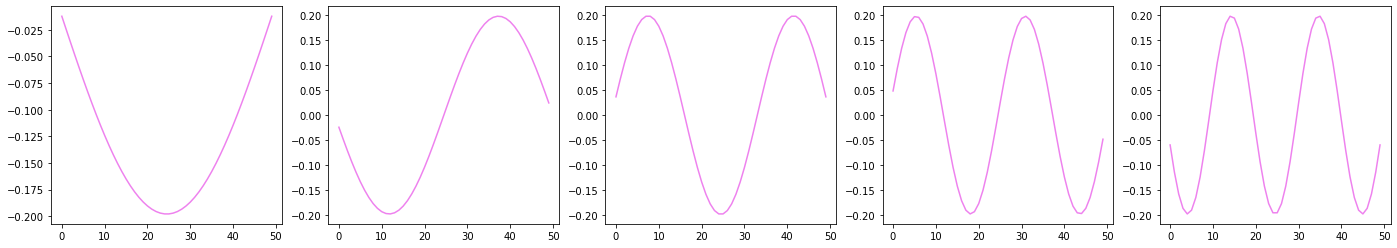

In [48]:
fig, ax = plt.subplots(1, 5, figsize=(24, 4))
for i in range(5):
    ax[i].plot(phi @  v[:, i], color='violet')

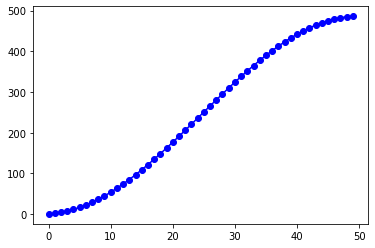

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(e, color='blue', marker='o')

$$
g(E) = \frac{dN(E)}{dE} = \frac{1}{N_k} \sum_k \delta(E - E(k)) = (E(k) =E_n) = \frac{1}{N_k} \sum_n \delta(E - E_n) \approx \sum_n \frac{1}{{(2 \pi \sigma^2})^{0.5}}e^{-\frac{(E - E_n)^2}{2\sigma^2}}
$$

In [50]:
gauss = lambda E, En, sigma: np.exp(-(E -En)**2/ (2 * sigma**2))/np.sqrt(2*np.pi*sigma**2)

In [55]:
bins = 25
bins_en = np.linspace(e[0], e[-1], bins)

In [57]:
dos = np.sum([gauss(E, e, 10) for E in bins_en], axis=1)

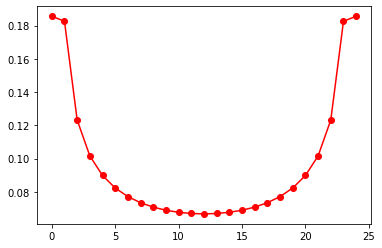

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(dos, color='red', marker='o')

2D

In [76]:
Lx = Ly = np.pi 
nx = ny = 50 
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)

In [77]:
phi = np.zeros((ny * nx, nx + ny))
for i in range(nx):
    for j in range(ny):
        phi[i*ny + j, i] = 1
        phi[i*ny + j, j+ny] = 1

In [79]:
import numba

In [80]:
@numba.njit()
def get_H(H, phi, nx, ny, dr):
    for m in range(nx * ny):
        for n in range(nx * ny):
            H[m, n] -= 0.5 * phi[m, nx:][1:nx-1] @ (np.diff(phi[n, nx:], 2) / dr ** 2) * phi[m, :nx] @  phi[n, :nx]
            H[m, n] -= 0.5 * phi[m, :nx][1:nx-1] @ (np.diff(phi[n, :nx], 2) / dr ** 2) * phi[m, nx:] @  phi[n, nx:]

In [81]:
H = np.zeros((nx * ny, nx * ny), dtype=np.complex128)
get_H(H, phi, nx, ny, dr=x[1])

In [82]:
make_symmetric(H)

In [83]:
e, v = np.linalg.eigh(H)
index = np.argsort(e)
e = e[index]
v = v[:, index]

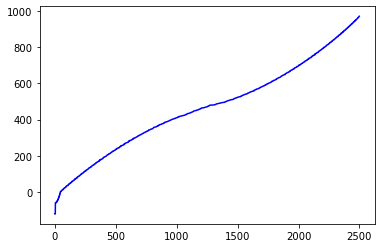

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(e, color='blue')

In [86]:
bins = 25
bins_en = np.linspace(e[0], e[-1], bins)

In [93]:
dos = np.sum([gauss(E, e, 10) for E in bins_en], axis=1)

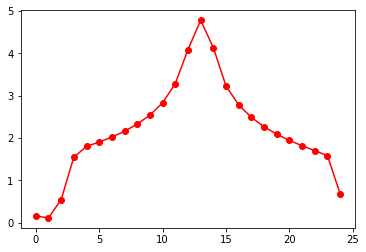

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(dos, color='red', marker='o')